## Additional software feature - spatial filtering
+ Figure S15 - Spatial filtering on Sinabung volcano, Indonesia with ALOS data

In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import colors, pyplot as plt, ticker
from mintpy.objects import sensor
from mintpy.utils import readfile, plot as pp, utils as ut
from mintpy.defaults.plot import *
from mintpy import view

work_dir = os.path.expanduser('~/insarlab/Others/Sinabung/SinabungT495AlosA/mintpy/geo')
os.chdir(work_dir)
print('Go to directory:', work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

dem_file = '../demGeo_tight.h5'
mask_file = 'geo_maskTempCoh.h5'
vel_files = ['geo_velocity.h5',
             'geo_velocity_lowpass_gaussian.h5',
             'geo_velocity_highpass_gaussian.h5']
ts_file = 'geo_timeseries_ECMWF_demErr_ramp.h5'
atr = readfile.read_attribute(vel_files[0])

lat, lon = 3.1163, 98.3466

Go to directory: /Users/yunjunz/insarlab/Others/Sinabung/SinabungT495AlosA/PYSAR/GEOCODED


In [2]:
## run spatial_filter.py
for filt in ['lowpass_gaussian', 'highpass_gaussian']:
    cmd = 'spatial_filter.py  {} {} 3'.format(vel_files[0], filt)
    print(cmd)
    #os.system(cmd)
print('Done.')

spatial_filter.py  geo_velocity.h5 lowpass_gaussian 3
spatial_filter.py  geo_velocity.h5 highpass_gaussian 3
Done.


save figure to file /Users/yunjunz/insarlab/Others/Sinabung/SinabungT495AlosA/PYSAR/GEOCODE/SinabungT495AlosA_spatial_filter.png


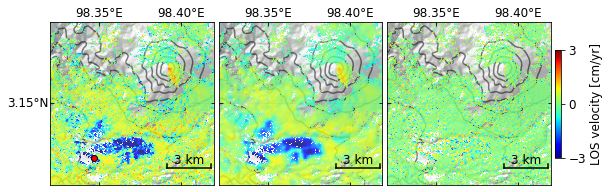

In [6]:
## (a-c) - Velocity field with different filtering setup.

print_msg = False
proj_name = 'SinabungT495AlosA'
num_ids = ['(a)', '(b)', '(c)']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[9, 3], sharey=True)
for i in range(len(vel_files)):
    cmd  = 'view.py {} -m {} --dem {} '.format(vel_files[i], mask_file, dem_file)
    cmd += '--sub-lat 3.10 3.20 --sub-lon 98.32 98.42 -v -3 3 '
    cmd += '--nocbar --notitle --fontsize 12 --scalebar 0.25 0.85 0.1 --lalo-step 0.05 '
    if i == 0:
        cmd += '--lalo-loc 1 0 1 0'
    else:
        cmd += '--lalo-loc 0 0 1 0'
    data, atr, inps = view.prep_slice(cmd, print_msg=print_msg)

    #plot
    ax = axs[i]
    ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps, print_msg=print_msg)
    if i == 0:
        ax.plot(lon, lat, 'ro', mfc='r', mec='k', ms=6)
fig.subplots_adjust(wspace=0.02)
# colorbar
cax = fig.add_axes([0.905, 0.25, 0.01, 0.5])
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=font_size)
cbar.locator = ticker.MaxNLocator(nbins=2)
cbar.update_ticks()
cbar.set_label('LOS velocity [cm/yr]', fontsize=font_size)

# output
out_file = os.path.join(os.getcwd(), '{}_spatial_filter.png'.format(proj_name))
print('save figure to file', out_file)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

In [5]:
# (d) - screen shot of Google Earth
# (e) - Plot Displacement time-series on one pixel
box = (400, 1400, 1180, 1950)
out_file = '{}_spatial_filter'.format(proj_name)
cmd = 'tsview.py {} --ylim -22 2 --tick-right '.format(ts_file)
cmd += '--lalo {} {} --figsize 5 2.5 --save -o {} '.format(lat, lon, out_file)
print(cmd)
os.system(cmd)
print('Run the command in terminal')

tsview.py geo_timeseries_ECMWF_demErr_ramp.h5 --ylim -22 2 --tick-right --lalo 3.1163 98.3466  --figsize 5 2.5 --save -o SinabungT495AlosA_spatial_filter 
Run the command in terminal
